In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rayhanalshawedi","key":"db7fff013b70185f993911193dbf807c"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          36467       1018  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5531        147  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7358        155  1.0              
mohithsairamreddy/salary-data 

In [ ]:
#! kaggle datasets download -d rayhanalshawedi/raf-db
! kaggle datasets download -d msambare/fer2013
#! kaggle datasets download -d rayhanalshawedi/jaf-NEW
# kaggle datasets download -d rayhanalshawedi/ck-hst6
#! kaggle datasets download -d rayhanalshawedi/ck-NEW


 96% 58.0M/60.3M [00:03<00:00, 24.4MB/s]
100% 60.3M/60.3M [00:03<00:00, 17.6MB/s]


In [ ]:
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,

        #validation_split = 0.3,
        rotation_range=0.1,
        width_shift_range=-0.1,
        height_shift_range=-0.1,
        shear_range=0.0,
        zoom_range=0.1,
        horizontal_flip=True,
        #vertical_flip=True,
        fill_mode='nearest'
        )


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.5)

test_datagen  = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.5)


In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = 'train',
                                                   target_size = (128,128),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 128)

Found 28709 images belonging to 7 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'test',
                                                  target_size = (128,128),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 3587 images belonging to 7 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = 'test',
                                                  target_size = (128,128),
                                                  class_mode = 'categorical',
                                                  subset = 'training',
                                                  batch_size =  128)

Found 3591 images belonging to 7 classes.


In [ ]:
x='FER2013_with_MopileNet'

In [ ]:
#base_model = tf.keras.applications.densenet.DenseNet121(input_shape=(224,224,3),include_top=False,weights="imagenet")
#base_model = InceptionV3(input_shape=(224,224,3),include_top=False,weights="imagenet")

base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(128,128,3),include_top=False,weights="imagenet")
#base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(14,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 16384)            65536     
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 32)                524320    
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                      

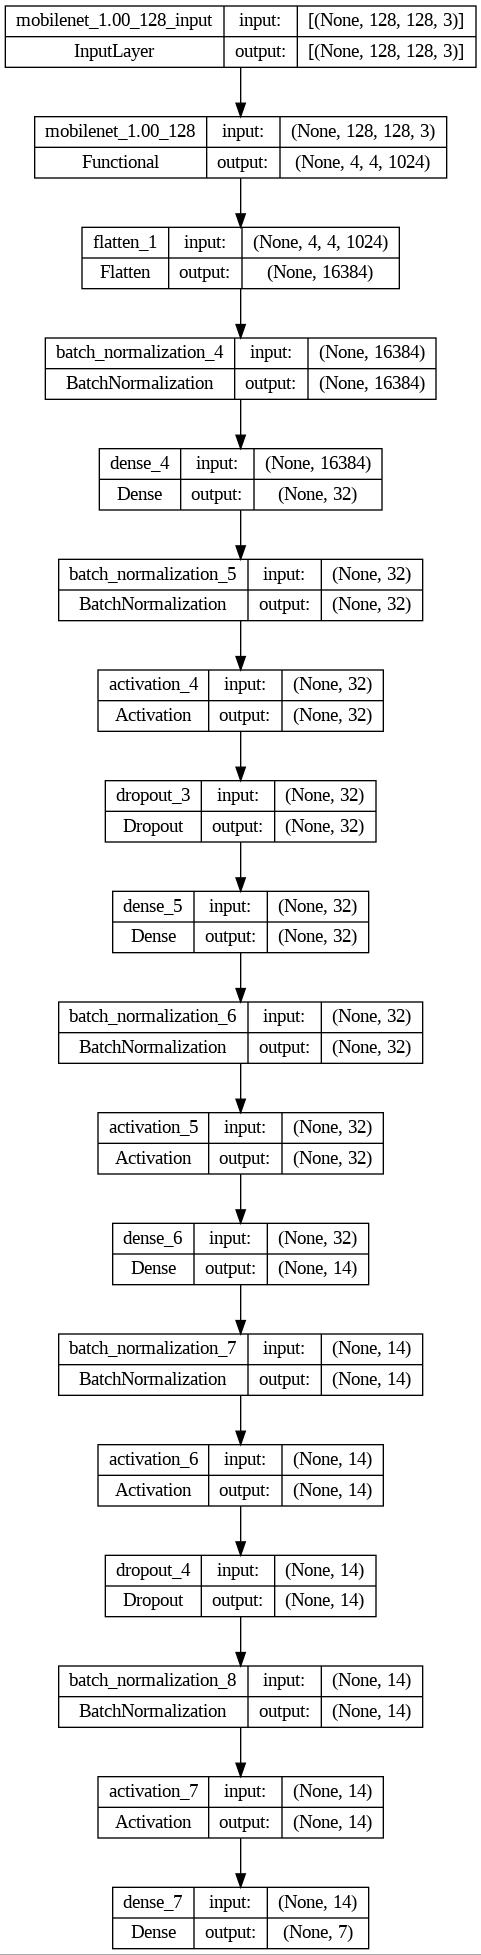

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='FER2013.jpg', show_shapes=True,show_layer_names=True)
Image(filename='FER2013.jpg')

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience =20, verbose = 1,factor = 0.5, min_lr = 1e-10)
i=0
filepath ="/content/gdrive/My Drive/ModelWeights/modelname.epoch{epoch:02d}--accuracy{val_accuracy:.3f}.hdf5"

mcp = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
#mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 1.6608 - accuracy: 0.8642 - precision: 0.6503 - recall: 0.1068 - auc: 0.7428 - f1_score: 0.1784
Epoch 1: val_accuracy improved from -inf to 0.88239, saving model to /content/gdrive/My Drive/ModelWeights/modelname.epoch01--accuracy0.882.hdf5
225/225 [==============================] - 144s 586ms/step - loss: 1.6608 - accuracy: 0.8642 - precision: 0.6503 - recall: 0.1068 - auc: 0.7428 - f1_score: 0.1784 - val_loss: 1.3483 - val_accuracy: 0.8824 - val_precision: 0.8096 - val_recall: 0.2311 - val_auc: 0.8493 - val_f1_score: 0.3467 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.4088 - accuracy: 0.8773 - precision: 0.7305 - recall: 0.2237 - auc: 0.8274 - f1_score: 0.3412
Epoch 2: val_accuracy improved from 0.88239 to 0.88665, saving model to /content/gdrive/My Drive/ModelWeights/modelname.epoch02--accuracy0.887.hdf5
225/225 [==============================] - 130s 579ms/step - loss: 1.40

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,f1,val_f1):

    fig, (ax1, ax2,ax5) = plt.subplots(1,3, figsize= (21,5))
    fig.suptitle(x)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])



    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])

    plt.show()


Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['f1_score'],history.history['val_f1_score']
              )

NameError: ignored

In [ ]:
import os
classes = os.listdir('test')
print(classes)

['surprise', 'sad', 'fear', 'disgust', 'neutral', 'happy', 'angry']


In [ ]:
print(np.min(history.history['val_accuracy']))
print(np.mean(history.history['val_accuracy']))
print(np.max(history.history['val_accuracy']))
print(np.min(history.history['val_loss']))
print(np.mean(history.history['val_loss']))
print(np.max(history.history['val_loss']))


0.877693235874176
0.8996192622184753
0.905611515045166
1.0277578830718994
1.0827964377403259
1.441560983657837


In [ ]:
from tqdm import tqdm
y_test=[]
y_test_int=[]
for i in tqdm(range(len(valid_dataset))):
  y_test+=valid_dataset[i][1].tolist()
  y_test_int+=valid_dataset[i][1].argmax(axis=1).tolist()
y_test=np.array(y_test)
y_test_int=np.array(y_test_int)

100%|██████████| 29/29 [00:03<00:00,  7.39it/s]


In [ ]:
y_pred_test = model.predict(valid_dataset,verbose=1)

y_pred_test_int = y_pred_test.argmax(axis = 1)

29/29 [==============================] - 3s 82ms/step


Text(0.5, 1.0, 'FER2013_with_MopileNet')

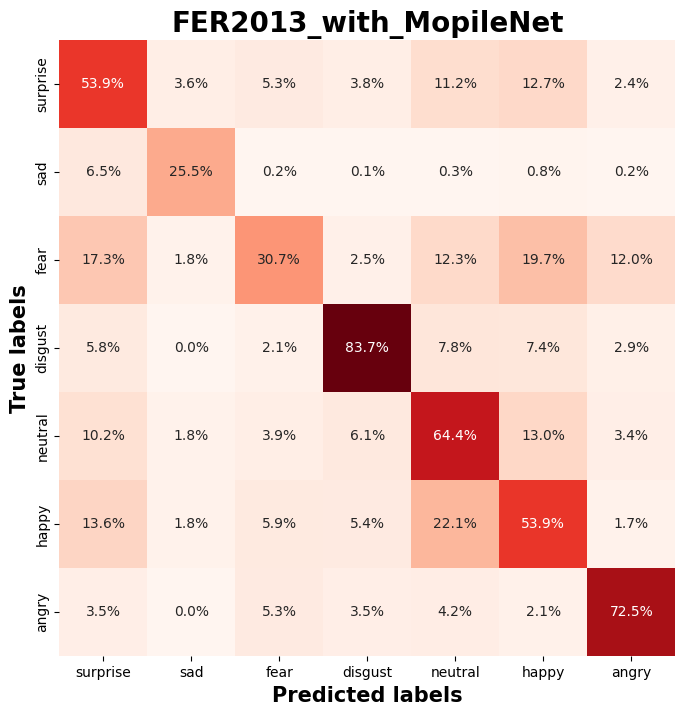

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay

fig, ax= plt.subplots(figsize=(10,8))


cm=confusion_matrix(y_test_int, y_pred_test_int)
cm = (cm.astype('float') / cm.sum(axis=1))

sns.heatmap(cm,annot=True,cmap=plt.cm.Reds,square=True,cbar=False,fmt='.1%',xticklabels= classes, yticklabels= classes)


ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title(x, fontsize=20, fontweight='bold')

In [ ]:
model_save_name = x

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = f"/content/gdrive/My Drive/ModelWeights/{model_save_name}.keras"
model.save(path)